In [1]:
import numpy as np
from math import sqrt

from pylearn_ml191.linear_regression import LogisticRegression

import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

##  Data Generation

In [2]:
# Settings for generate data
means = [[2, 2], [4, 2]]
cov = [[.2, 0], [0, .2]]

# Nums sample for each class 
N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

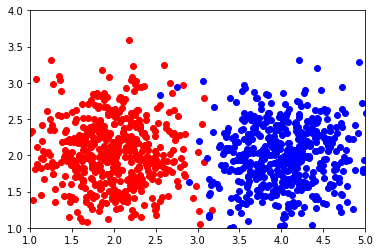

In [3]:
plt.scatter(X0[:, 0], X0[:, 1], c ='red', alpha = 1)
plt.scatter(X1[:, 0], X1[:, 1], c ='blue', alpha = 1)
plt.xlim(1, 5)
plt.ylim(1, 4)
plt.show()

In [4]:
X = np.concatenate((X0, X1), axis=0)
X = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
y = np.reshape(np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 0), (2*N, 1))

## Logistic Regression

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [6]:
model = LogisticRegression(use_features_extractor=False)
history = model.fit(X_train, y_train, 
                    X_val, y_val, 
                    batch_size=16, 
                    verbose=20)

[Step: 20] Train-loss: 0.5941, Val-loss: 0.5951
[Step: 40] Train-loss: 0.4388, Val-loss: 0.4648
[Step: 60] Train-loss: 0.3528, Val-loss: 0.3931
[Step: 80] Train-loss: 0.3300, Val-loss: 0.3560
[Step: 100] Train-loss: 0.2519, Val-loss: 0.3259
[Step: 120] Train-loss: 0.1287, Val-loss: 0.3128
[Step: 140] Train-loss: 0.2077, Val-loss: 0.2925
[Step: 160] Train-loss: 0.3103, Val-loss: 0.2801
[Step: 180] Train-loss: 0.1335, Val-loss: 0.2701
[Step: 200] Train-loss: 0.2023, Val-loss: 0.2655
[Step: 220] Train-loss: 0.1576, Val-loss: 0.2567
[Step: 240] Train-loss: 0.1249, Val-loss: 0.2497
[Step: 260] Train-loss: 0.1140, Val-loss: 0.2445
[Step: 280] Train-loss: 0.1361, Val-loss: 0.2397
[Step: 300] Train-loss: 0.4707, Val-loss: 0.2346
[Step: 320] Train-loss: 0.2346, Val-loss: 0.2322
[Step: 340] Train-loss: 0.1280, Val-loss: 0.2271
[Step: 360] Train-loss: 0.3011, Val-loss: 0.2240
[Step: 380] Train-loss: 0.2918, Val-loss: 0.2213
[Step: 400] Train-loss: 0.1444, Val-loss: 0.2184
[Step: 420] Train-loss: 

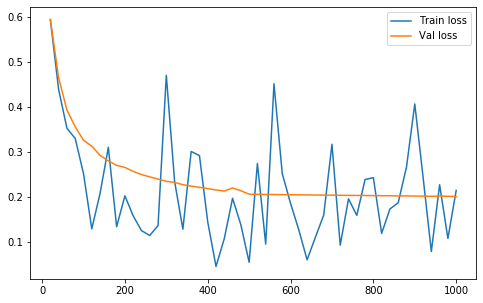

In [7]:
plt.figure(figsize=(8,5))
plt.plot(history["steps"], history["train_losses"], label='Train loss')
plt.plot(history["steps"], history["val_losses"], label='Val loss')
plt.legend()
plt.show()

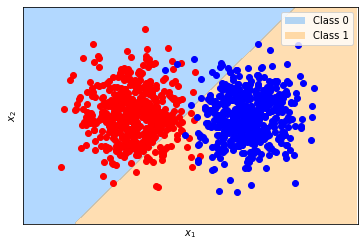

In [8]:
step_size = 0.025
x_min = 0
x_max = 6
y_min = 0
y_max = 4

xx = np.arange(-1, 6, step_size)
yy = np.arange(0, 4, step_size)
xx, yy = np.meshgrid(xx, yy)

xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)

XX = np.concatenate((np.ones((xx.size, 1)), xx1, yy1), axis = 1)

y_preds = model.predict(XX)
y_preds = np.reshape(y_preds, xx.shape)

cs = plt.contourf(xx, yy, y_preds, cmap='jet', alpha = .3, levels=1)
proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]
plt.legend(proxy, ["Class 0", "Class 1"])
plt.scatter(X0[:, 0], X0[:, 1], c = 'red', alpha = 1)
plt.scatter(X1[:, 0], X1[:, 1], c = 'blue', alpha = 1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('$x_1$', fontsize = 10)
plt.ylabel('$x_2$', fontsize = 10)
plt.show()